# Final Exam

The exam is due at 11:00 am on Wednesday May 8th. Late exams will not be accepted without having prior discussion with me. You are allowed to use whatever course materials, notes, or bioinformatics programs you wish to complete the exam. You may **not** discuss this exam with anyone other than me. If I catch you discussing your exam or sharing answers with anyone, you will receive a 0 and I will report you to the registrar.

For all questions on the exam, fully show or explain your work. If you wish to use python or R to solve a problem, please include all code you used. Add coding or markdown cells to the notebook as appropriate. If you would like to include your R code in an external document that is okay just make sure each section of code is clearly labeled to which question it belongs to.

If you are using an outside tool, describe in detail how you choose to use that tool. If you changed any settings away from the default on a tool, tell me what you choose to do. Justify your approach to solving the problem when applicable. 

If you have any questions, or run into a problem on the exam please let me know ASAP. I will also check my email frequently and respond to any questions that are submitted to me before 8:30 pm. Any emails after 8:30 pm are not guaranteed to get a response before Wednesday morning.

Include figures in your exam when appropriate. To add an image add this code to a Markdown cell `<img src = "filenameORurl2image">.` <b>Make sure to include those images with your exam upload</b> or I will not be able to view them. 

If you load any data into your exam notebook, please be sure to upload those files to Moodle with your submission.

Submit your exam as a jupyter notebook (.ipynb file).

#### (1) Sign your name indicating that you have adhered to the academic honesty policy set out by the college and to assert that the work in this file is yours alone. (2 pts)

Aaron James Standefer

#### (2) Perform a local alignment between `GAATTCACACTTAGGTGTGAAAT` and `GCACGTAGGTGCTACTTTTTTGTAA`.  Have a match score of 2, a mismach score of -1, and a gap score of -1. Show me your optimal alignment(s). What was the score of the alignment? (7 pts)

In [1]:
from Bio.Seq import Seq
from Bio import SeqIO, Align, motifs
from Day2_Lab import *

seq1 = Seq("GAATTCACACTTAGGTGTGAAAT")
seq2 = Seq("GCACGTAGGTGCTACTTTTTTGTAA")
aln = Align.PairwiseAligner(match_score = 2.0)
aln.mismatch_score = -1.0
aln.open_gap_score = -1.0
aln.extend_gap_score = -1.0
alns = aln.align(seq1, seq2)
for alignment in alns:
    print(alignment)
print(aln.score(seq1, seq2))

target            0 GAAT-TCA----C-ACTTAGGTGTGAAAT 23
                  0 |.|.-|-|----|-||||...|||-||-- 29
query             0 GCACGT-AGGTGCTACTTTTTTGT-AA-- 25

target            0 GAA-TTCA----C-ACTTAGGTGTGAAAT 23
                  0 |.|-.|-|----|-||||...|||-||-- 29
query             0 GCACGT-AGGTGCTACTTTTTTGT-AA-- 25

target            0 G-AATTCA----C-ACTTAGGTGTGAAAT 23
                  0 |-|..|-|----|-||||...|||-||-- 29
query             0 GCACGT-AGGTGCTACTTTTTTGT-AA-- 25

target            0 GAA--T---TCAC-ACTTAGGTGTGAAAT 23
                  0 |.|--|---|.-|-||||...|||-||-- 29
query             0 GCACGTAGGTG-CTACTTTTTTGT-AA-- 25

target            0 G-AA-T---TCAC-ACTTAGGTGTGAAAT 23
                  0 |-|.-|---|.-|-||||...|||-||-- 29
query             0 GCACGTAGGTG-CTACTTTTTTGT-AA-- 25

target            0 G-A-AT---TCAC-ACTTAGGTGTGAAAT 23
                  0 |-|-.|---|.-|-||||...|||-||-- 29
query             0 GCACGTAGGTG-CTACTTTTTTGT-AA-- 25

target            0 G-A---AT-TCAC-ACTTAG

#### (3)  Find the 6-mer motif hidden inside `final_exam_hidden_motifs.fasta`. What is the consensus sequence and what is the score for your set of motifs? Show all of your work and justify your approach. (15 pts)

In [6]:
records = list(SeqIO.parse("final_exam_hidden_motifs.fasta", "fasta"))
newRecords = []
for entry in records:
   newRecords.append(str(entry.seq))
print(newRecords)
motif6 = MotifEnumeration(newRecords, 6, 2)
print(motif6)
DNA_motif = motifs.create(list(motif6))
consensusSeq = DNA_motif.consensus
print(consensusSeq)
print(score(list(motif6), newRecords))


    

['CGGGTAGATCAAACGCGTACGTGAGTTGATTCAAGCTTCCGCCACATTGC', 'TGGATCCGTGTAATGCGACTGACTCGTCCCGTCGGGGTCCTGATAGTATC', 'AAACTTCGTCTAGGACCAAAGCCCATTTCCCTCAGTGACTATCCGGCTTC', 'TTGATGGCCATCTGAATGCGGATGCGCCTGTCGCAGACCTCGCGTAAGGA', 'GATCCCCGACTTCAAAGTCGTGCCCGAAAGATAACTGGGCGTGACCCGTT', 'CGACAACTGATATCTAATAAGGTTGGCAGCGTTAGCCAACGTGTGCCCGA', 'TTCCCCCCTATCCGCACTTGCACCTGTAAGCCAGTCACAGCTAAAAGTTT', 'CGCTTGGAGTACACAAATGACATAGCCTCAAAAGAAGACTGAAATACGAT', 'ATGCGCGGCCCCCATGACAACTCGGTGTGTTATCAGGTGGGATGGGCTGC', 'TTGGGCCAAGTGCTCGGCTATTGTATGTTGCCCGGTTTAGCACATGTAAC']
{'GTACGT', 'ATCCCA', 'AGTGAG', 'GTACCA', 'AATGCC', 'GGGTCA', 'CTCACA', 'GCCTGC', 'ATACCA', 'TGCCTA', 'TCATCG', 'CAGGGA', 'CCCATG', 'CGGCCT', 'GTGGAC', 'CAAGGC', 'ATCGTC', 'AACCGC', 'ACACTT', 'TTAATA', 'ATGCCA', 'GGATTT', 'GGTGAC', 'AGGCGA', 'ATAGCT', 'CGTCAA', 'AGTCGG', 'TACTGC', 'ATAGGC', 'GGCTAC', 'CGCGTT', 'CGACTT', 'CAATTG', 'GCGAAG', 'ATGTGA', 'GTGTCA', 'CCTCGT', 'ACTTGA', 'GTGAAA', 'CACGTT', 'CCGTAA', 'AGTTAG', 'GTATGA', 'AAGCGT', 'CCGCCA', 'CGTTAG'

I used the methods we discussed during the first few days of class.  I will upload my py file with the functions I used for your reference but to make this exam more readable I'll leave them on there.  This approach involved parsing the fasta file, then converting it to a list.  With this list of sequences, I was able to enumerate through them and make a list of possible canidates, with a d of 2 since 0 and 1 didn't get any results.  The consensus is only C which I was rather surprised by.

#### (4) (a) Two mystery pdb structures are on Moodle. Identify them. Show or describe your work. (5 pts)

I used R to read the pdb files, convert them into sequences, and then clean them up so it's just the amino acids.  I then took these and threw them up on BLAST to see what came up.
Protein 1: kinesin-like protein KIF11 (not human)
Protein 2: kinesin-like protein KIF15 (looks like human or gorilla)
NOTE: For any time I used R, I put all the code I use in the R file I uploaded with this journal.

#### (b) What is the sequence identity and sequence similarity between the two structures? What do these two metrics measure? (10 pts)

The sequence identity and similarity, at least based on the methods in bio3d in R, is 0.56.  Identity is a measure of how many AA match exactly, which similarity is a measure of how closely two sequences resemble each other.

#### (c) What is the RMSD between the structures? What does RMSD measure and what does your value tell you about the two structures? (15 pts)

RMSD is 7.531 between the two structures.  RMSD or Root Mean Square Deviation, in respect to sequences, is the measure of the average distance between the atoms of two atomic structures.  In our case, it's measuring the average distance between all the atoms of Protein1 versus Protein2.  In general, a lower RMSD is better.  Since the RMSD is less than 10, this means that while our structures are similar, there is enough difference to be notable.

#### (d) Are the sequences orthologs or paralogs? How do you know? (4 pts)

Ortholog.  It is a very similar protein but found in different species.  A paralog would be related proteins but not with that specific.

#### (e) Pick one of the sequences, [Mol* 3D Viewer](https://www.rcsb.org/3d-view). What types of secondary structure do you see? (4 pts)

In protein2, there are MG and ADP structures within the structure.

#### (f) Pick a secondary database (or two) to search both proteins against.  What database(s) did you pick? What did you learn about the proteins? (8 pts)

I picked PDB as opposed to NIH.  This database actually gave me the length of the two proteins, the second one being a bit longer than the first one.  It is very clear from here that they are distinct in terms of their structure, yet very similar in terms of their function.

#### (g) How else might we compare these two structures? (4 pts) 

We can look at how they allign, their RSMD, needle them, or look up more detailed information on their exact functions in their respective organisms.

#### (5) You are performing De Novo peptide sequencing and have received the following mass spectrum for a cyclic peptide. Identify the peptide. Show your work and discuss your methods. (15 pts)

In [2]:
experimental_spectra = [0, 71, 87, 97, 97, 129, 131, 131, 137, 156, 163, 168, 194, 208, 218, 250, 260, 260, 262, 265, 285, 293, 305, 347, 349, 357, 364, 381, 391, 402, 416, 422, 428, 444, 461, 478, 478, 493, 512, 515, 547, 553, 558, 565, 575, 590, 609, 624, 634, 641, 646, 652, 684, 687, 706, 721, 721, 738, 755, 771, 777, 783, 797, 808, 818, 835, 842, 850, 852, 894, 906, 914, 934, 937, 939, 939, 949, 981, 991, 1005, 1031, 1036, 1043, 1062, 1068, 1068, 1070, 1102, 1102, 1112, 1128, 1199]

In [9]:
aaMasses = {'G': 57, 'A': 71, 'S': 87, 'P': 97, 'V': 99, 'T': 101, 'C': 103, 'I': 113, 'L': 113, 'N': 114, 'D': 115, 'K': 128, 'Q': 128, 'E': 129, 'M': 131, 'H': 137, 'F': 147, 'R': 156, 'Y': 163, 'W': 186}
massesAA = {57: 'G', 71: 'A', 87: 'S', 97: 'P', 99: 'V', 101: 'T', 103: 'C', 113: '(I/L)', 114: 'N', 115: 'D', 128: '(K/Q)', 129: 'E', 131: 'M', 137: 'H', 147: 'F', 156: 'R', 163: 'Y', 186: 'W'}
def peptideToMax(sequence):
    l = len(sequence)
    seqList = []
    for i in range(l):
        seqList.append(aaMasses[sequence[i]])
    finalString = ""
    for j in range(l):
        finalString+=str(seqList[j])
        if j!=l-1:
            finalString+="-"
    return finalString

def massToPeptide(mass: list):
    newList = []
    for entry in mass:
        newList.append(int(entry))
    final = ""
    for number in newList:
        final+=massesAA[number]
    return final

def massInSpectrum(spectrum):
    return set([mass for mass in spectrum if mass in aaMasses.values()])

values = list(massInSpectrum(experimental_spectra))
peptide = massToPeptide(values)
print(peptide)


PEMYAHSR


I took some of the functions we made during the Day 11 lab and slightly tweaked them to work with the mass spectrum format.  I took the spectrum, converted it into just the value that equaled up to the dictionary of AA's.  Then I took that list and converted into a peptide.

#### (6) (a) What is the origin of replication and why do biologists care? (5 pts)

The origin of replication is a particular sequence in a genome that is coded for when replication is to begin in DNA.  Biologists care because this is an important part of the DNA, and in cyclical genomes it is much harder to identify where this is, this is where Bioinformatics comes in.

#### (b) Identify the location of the origin of replication and the DnaA box sequence inside the mystery genome. Show your work and discuss your methods. (15 pts)

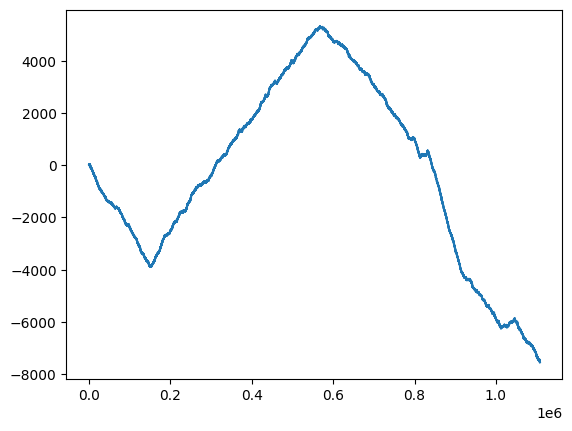

['TGCGGTGGT', 'ACCACCGCA', 'TGCGATGAT', 'ATCATCGCA', 'ATCGGTACT', 'AGTACCGAT', 'ATCTCTACT', 'AGTAGAGAT', 'ATCTGAACT', 'AGTTCAGAT', 'ACCTGTACT', 'AGTACAGGT', 'CTGTACTAT', 'ATAGTACAG', 'CTCTACTGT', 'ACAGTAGAG', 'TTGCGATAG', 'CTATCGCAA', 'TTCCGATGG', 'CCATCGGAA', 'TCCGATGGT', 'ACCATCGGA', 'TGCGATAGT', 'ACTATCGCA', 'GCGATAGTA', 'TACTATCGC', 'CCGATGGTA', 'TACCATCGG', 'CGATGGTAG', 'CTACCATCG', 'CGATAGTAT', 'ATACTATCG', 'GATAGTATA', 'TATACTATC', 'GATGGTAGA', 'TCTACCATC', 'GGTATATAC', 'GTATATACC', 'GGTTTAAAC', 'GTTTAAACC']


In [11]:
from Day2_Lab import *
import matplotlib.pyplot as plt

def skew(text):
    sCountList = []
    sCount = 0
    length = len(text)
    for i in range(length):
        if text[i] == 'C':
            sCount -= 1
        elif text[i] == 'G':
            sCount += 1
        sCountList.append(sCount)
    return sCountList

def minimizeSkew(text):
    minimum = 0
    locations = []
    count = 1
    for i in skew(text):
        if i < minimum:
            minimum = i
            locations = [count]
        elif i==minimum:
            locations.append(count)
        count+=1
    return locations

def neighbors(pattern, d):
    nucTides = {'A','C','G','T'}
    if d==0:
        return {pattern}
    if len(pattern)==1:
        return nucTides
    progNeighbors = neighbors(pattern[1:], d)
    
    bors = set()
    for i in progNeighbors:
        if hammingDist(pattern[1:], i) < d:
            bors.update([nuc + i for nuc in nucTides])
        else:
            bors.add(pattern[0] + i)
    
    return bors

def hammingDist(textA, textB):
    dist = 0
    length = len(textA)
    for i in range(length):
        if textA[i] != textB[i]:
            dist+=1
    return dist

def freqWordsWithMisMatchRC(text, k, d):
    
    patterns = []
    freqMap = {}
    n = len(text)
    
    for i in range(n-k+1):
        pattern = text[i:i+k]
        bors = neighbors(pattern, d)
        for j in bors:
            nB = j
            reverseNB = ReverseComplement(j)
            freqMap[nB] = freqMap.get(nB, 0) + 1
            freqMap[reverseNB] = freqMap.get(reverseNB, 0) + 1
    m = MaxMap(freqMap)
    for key in freqMap:
        if freqMap[key] == m:
            patterns.append(key)
    return patterns

if __name__ in "__main__":
    genome = open("genome.txt", 'r').read().split()
    genome = "".join(genome)

    plt.plot(skew(genome))
    plt.show()
    
    shortGenome = minimizeSkew(genome)
    print(freqWordsWithMisMatchRC(genome[shortGenome[0]:shortGenome[0]+500], 9, 1))

I took the work I did from lab report 1 and brought it here.  In that lab, I took the Ecoli genome and did the same thing, finding the DnaA box and the Ori.  By taking only a small part of the Genome(going thru the whole thing, while accurate, would take too long), and then finding the frequent 9-mers with a d factor of 1, I was able to find a good list of the possible areas of where Ori and DnaA box are.  This is as well as with a graph of the skew of the genome as well.